In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from OptimizationTestFunctions import Sphere, Ackley, AckleyTest, Rosenbrock, Fletcher, Griewank, Penalty2, Quartic, Rastrigin, SchwefelDouble, SchwefelMax, SchwefelAbs, SchwefelSin, Stairs, Abs, Michalewicz, Scheffer, Eggholder, Weierstrass
import time
from IPython import display
sns.set_theme()
# Autoload packages
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


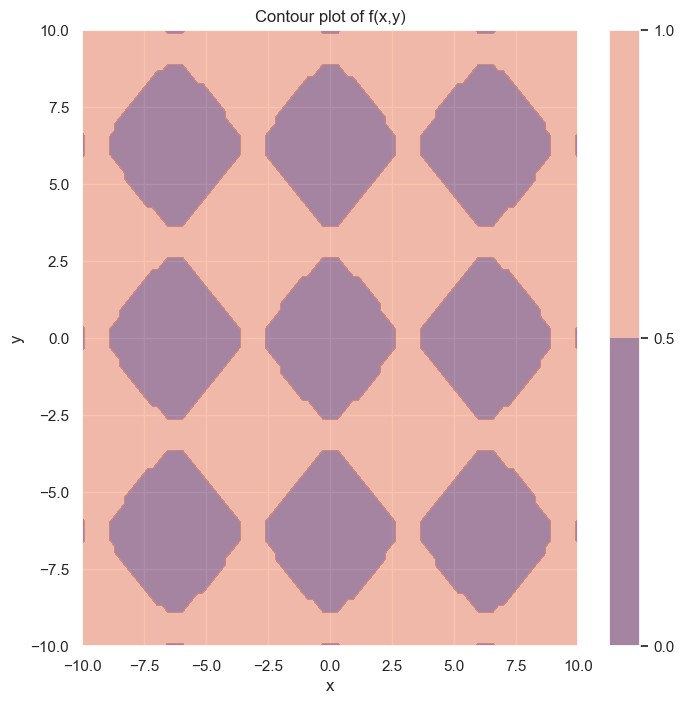

In [101]:
# 0=Failure, 1=Success
func = Fletcher(2)
# f = lambda x: (np.sign(func(x) - 27000) + 1) / 2
f = lambda x: (-np.sign(np.cos(1 * x[:, 0]) + np.cos(1* x[:, 1]) - 0.1) + 1)/2

# f = lambda x: func(x)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.array([X.flatten(), Y.flatten()]).T).reshape(X.shape)
plt.figure(figsize=(8, 8))
plt.contourf(X, Y, Z, levels=1, alpha=0.5)
plt.colorbar()
plt.title('Contour plot of f(x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [102]:
def gaussian(x, mu:float, sigma:float) -> float:
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))

MAX_RADIUS = 5.0
MIN_RADIUS = 1.0
SIGMA = 0.8
def fitnessPerRadius(r) -> float:
    mu = (1 -np.cos((r - MIN_RADIUS) / (MAX_RADIUS - MIN_RADIUS) * np.pi/2)) if r > MIN_RADIUS else 0
    return lambda x : gaussian(x, mu, SIGMA), mu



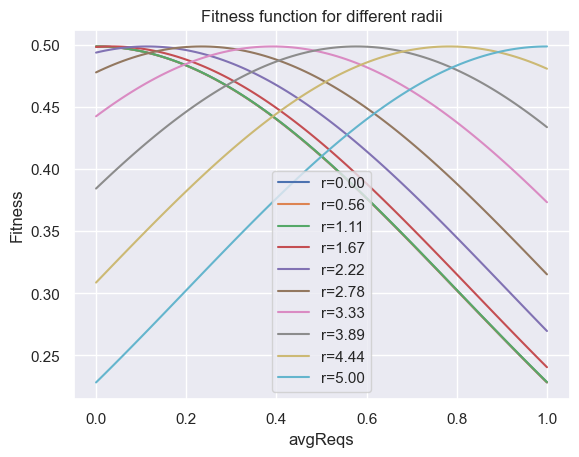

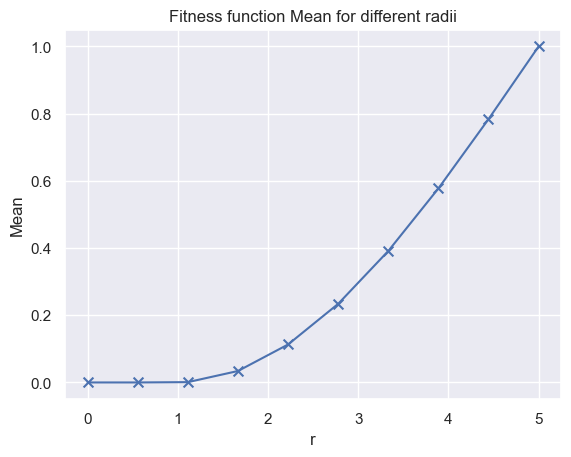

In [103]:
%matplotlib inline
rs = np.linspace(0, MAX_RADIUS, 10)
mus = []
for r in rs:  # Use np.arange to generate values with a step
    avgReqs = np.linspace(0, 1, 100)
    fitness, mu = fitnessPerRadius(r)
    mus.append(mu)
    y = fitness(avgReqs)
    plt.plot(avgReqs, y, label=f'r={r:.2f}')
plt.title('Fitness function for different radii')
plt.xlabel('avgReqs')
plt.ylabel('Fitness')
plt.legend()
plt.show()

plt.plot(rs, mus)
plt.scatter(rs, mus, marker='x', s=50)  # Set a scalar value for s
plt.title('Fitness function Mean for different radii')
plt.xlabel('r')
plt.ylabel('Mean')
plt.show()


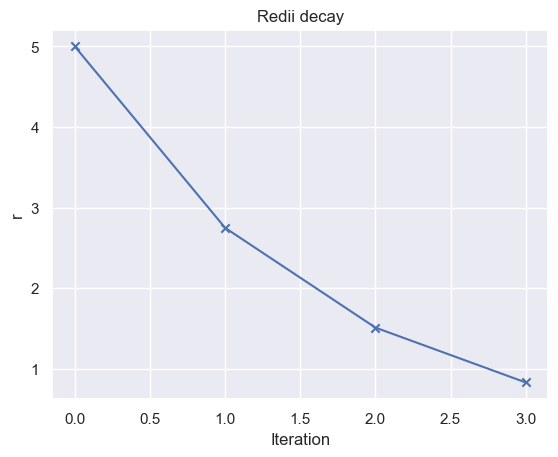

In [104]:
# How the redii decreases
def nextRedius(r):
    return r * 0.55

r = MAX_RADIUS
rs = [r]
while r > MIN_RADIUS:
    r = nextRedius(r)
    rs.append(r)

plt.plot(rs)
plt.scatter(range(len(rs)), rs, marker='x')
plt.title('Redii decay')
plt.xlabel('Iteration')
plt.ylabel('r')
plt.show()

In [105]:
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
%matplotlib inline
class InteractivePlotter:
    def __init__(self):
        plt.ioff()
        self.fig = plt.figure(figsize=(10, 15))
        self.axs = [self.fig.add_subplot(3, 1, 1),self.fig.add_subplot(3, 1, 2), self.fig.add_subplot(3, 1, 3, projection='3d')]

    def __call__(self, dt, samples, centroid, candidates, radius, reqs, nextCandidate, fitness):
        self.draw(samples=samples, centroid=centroid, candidates=candidates, radius=radius, reqs=reqs, nextCandidate=nextCandidate, fitness=fitness)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(dt)

    def draw(self, samples, centroid, candidates, radius, reqs, nextCandidate, fitness):
        self.axs[0].cla()
        self.axs[0].contourf(X, Y, Z, levels=1, colors=['blue', 'red'], alpha=0.5)
        circle = plt.Circle(centroid, radius, color='red', fill=False)
        self.axs[0].add_artist(circle)
        self.axs[0].scatter(samples[:-1, 0], samples[:-1, 1], marker='x', c=reqs[:-1], cmap='viridis')
        self.axs[0].scatter(samples[-1, 0], samples[-1, 1], c='black', marker='o', s=100)
        scatter = self.axs[0].scatter(candidates[:, 0], candidates[:, 1], c=avgReqs, cmap='viridis', marker='o')
        scatter.set_clim(0, 1)  # Set the color map limits
        self.axs[0].scatter(centroid[0], centroid[1], c='red', marker='x')
        self.axs[0].scatter(nextCandidate[0], nextCandidate[1], c='green', marker='o', s=100)
        self.axs[0].set_title(f'Contour plot of f(x,y) with samples and candidates')
        self.axs[0].set_xlabel('x')
        self.axs[0].set_ylabel('y')
        self.axs[0].set_xlim(-10, 10)
        self.axs[0].set_ylim(-10, 10)

        self.axs[1].cla()
        fitnesses = fitness(avgReqs)
        self.axs[1].scatter(avgReqs, fitnesses, c='black', marker='x')
        

        self.axs[2].cla()
        self.axs[2].scatter(samples[:, 0], samples[:, 1], reqs, c=reqs, cmap='viridis', marker='o')
        self.axs[2].set_title(f'3D Scatter plot of samples with reqs')
        self.axs[2].set_xlabel('x')
        self.axs[2].set_ylabel('y')
        self.axs[2].set_zlabel('reqs')
        self.axs[2].set_xlim(-10, 10)
        self.axs[2].set_ylim(-10, 10)
        self.axs[2].set_zlim(0, 1)
        self.axs[2].view_init(elev=20, azim=30)

plotter = InteractivePlotter()


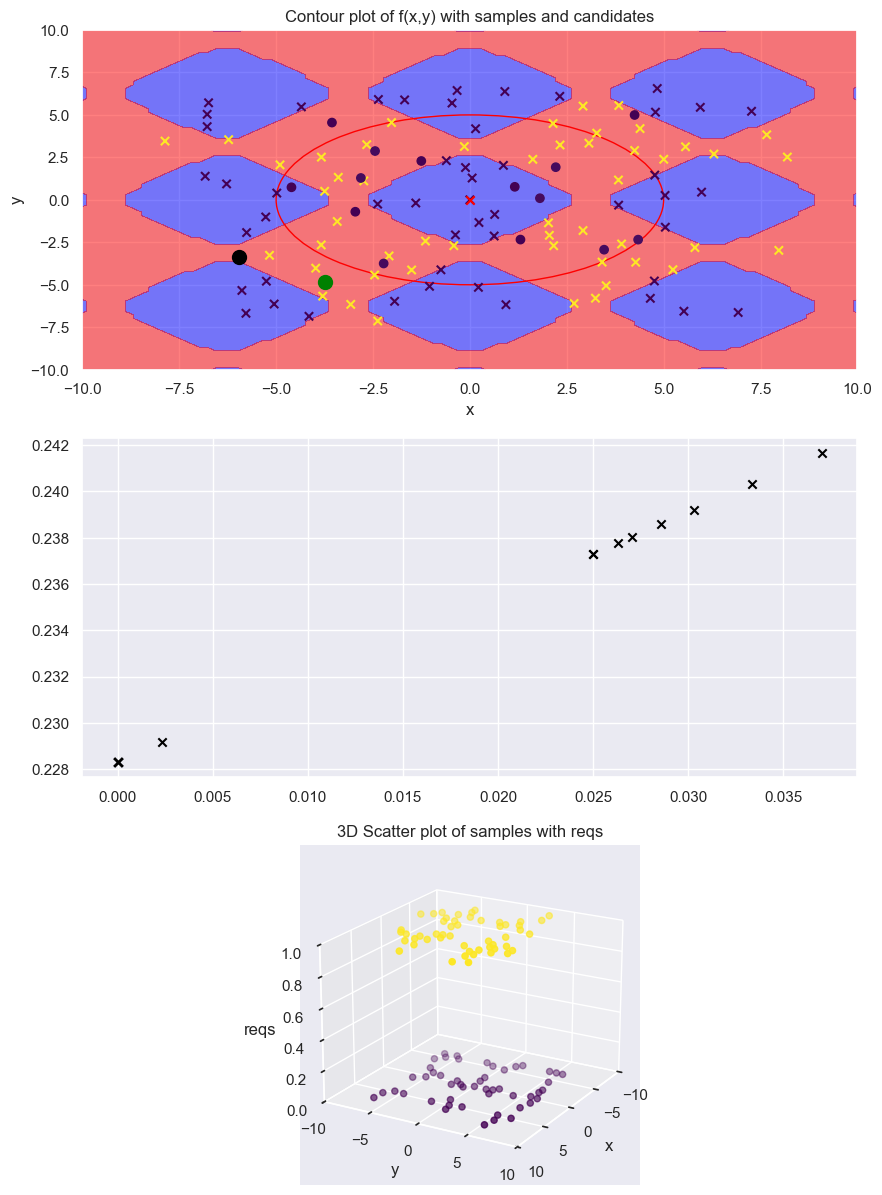

ValueError: invalid literal for int() with base 10: ''

In [113]:
%matplotlib inline
SAMPLES_PER_STEP = 15
centroid = np.array([0, 0])
samples = np.array([centroid])
reqs = np.array([f(np.array([centroid]))])
nextSteps = 300
for iteration in range(1000):
    centroid = np.array([0, 0])
    radius = MAX_RADIUS
    while radius > MIN_RADIUS:
        fitness, mu = fitnessPerRadius(radius)

        offsets = np.random.uniform(-radius, radius, (SAMPLES_PER_STEP, 2))
        candidates = centroid + offsets

        avgReqs=[]


        for candidate in candidates:
            distances = np.linalg.norm(samples - candidate, axis=1)
            if not np.any(distances <= radius):
                avgReqs.append(0.)
                continue
            distanceMask = distances <= radius
            distancesMasked = distances[distanceMask]
            weights = gaussian(distancesMasked, 0, radius/100)
            reqsMasked = reqs[distanceMask]
            print(reqsMasked)
            weightedReqs = np.multiply(reqsMasked, weights)
            avgReq = np.mean(weightedReqs) / np.sum(weights)
            print(avgReq)
            avgReqs.append(avgReq)


        # print(f"Iteration: {iteration}, Radius: {radius}, AvgReqs: {avgReqs}")

        avgReqs = np.array(avgReqs)

        fitnessValues = fitness(avgReqs)
        bestIndex = np.argmax(fitnessValues)
        nextCentroid = candidates[bestIndex]

        # print(f"Candidate: {candidate}, Fitness: {fitnessValues[bestIndex]}, Radius: {radius}")
        nextSteps -= 1
        if nextSteps <= 0:
            plotter(1, samples, centroid, candidates, radius, reqs, nextCandidate=nextCentroid, fitness=fitness)
            nextSteps = int(input("How many next steps? "))
        centroid = nextCentroid
        radius = nextRedius(radius)
    print(f"Iteration: {iteration}, Centroid: {centroid}, Radius: {radius}")
    samples = np.vstack((samples, centroid))
    reqs = np.append(reqs, f(np.array([centroid])))

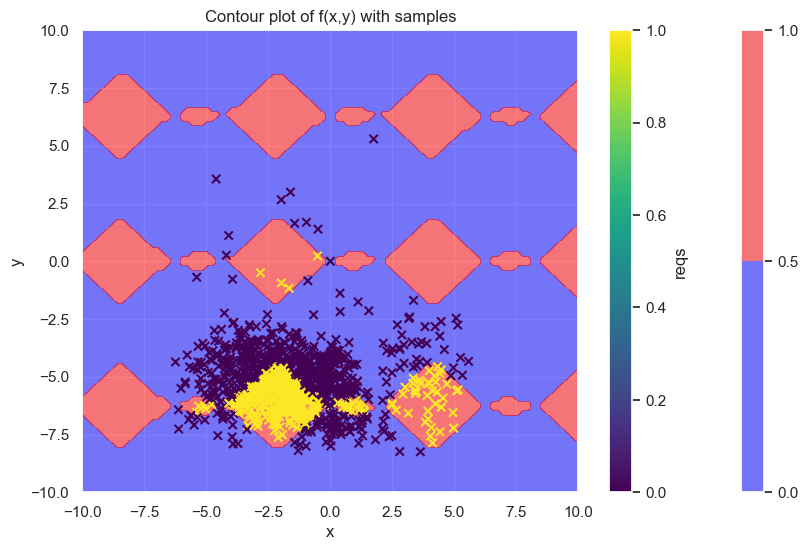

In [ ]:
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.5)
plt.colorbar()
plt.scatter(samples[:, 0], samples[:, 1], c=reqs, cmap='viridis', marker='x')
plt.colorbar(label='reqs')
plt.title('Contour plot of f(x,y) with samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()